<a href="https://colab.research.google.com/github/OlayonChingon/ArgentinaPrograma4.0/blob/main/Submuestreo_en_la_clase_mayoritaria_Undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
113/113 [==============================] - 2s 3ms/step - loss: 0.3426
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2629
Epoch 3/10
113/113 [==============================] - 0s 4ms/step - loss: 0.2496
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2421
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2359
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2277
Epoch 8/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2219
Epoch 9/10
113/113 [==============================] - 0s 4ms/step - loss: 0.2171
Epoch 10/10
29/29 [==============================] - 0s 2ms/step

Matriz de Confusión:
      No  Yes
No   785   22
Yes   73   25


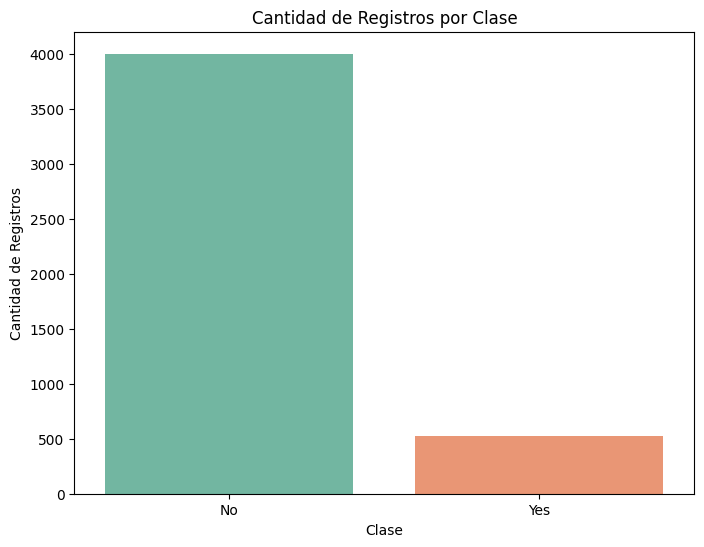

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

# Cargar el dataset
url = '/content/bank.csv'
data = pd.read_csv(url, sep=';')


# Procesar los datos
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Transformar etiquetas a numéricas
data['y'] = label_encoder.fit_transform(data['y'])

# Dividir en características y etiquetas
X = data.drop('y', axis=1)
y = data['y']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)







# Realizar predicciones en el conjunto de prueba
y_probs = model.predict(X_test)
y_pred = np.round(y_probs)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)


# Crear un gráfico de barras para mostrar la cantidad de registros por clase
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase')
plt.xticks([0, 1], ['No', 'Yes'])  # Etiquetas personalizadas para las clases
plt.show()


In [ ]:

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)

f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print("F1-score:", f1)

F1-score: 0.3448275862068966


INFORME DE PRESICION

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.53      0.26      0.34        98

    accuracy                           0.90       905
   macro avg       0.72      0.61      0.64       905
weighted avg       0.87      0.90      0.88       905



##Aplicando la tecnica de submuetreo evaluamos f1_score

Epoch 1/10
27/27 [==============================] - 1s 2ms/step - loss: 0.6211
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - loss: 0.5002
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 0.4493
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 0.4264
Epoch 5/10
27/27 [==============================] - 0s 2ms/step - loss: 0.4128
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3986
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3900
Epoch 8/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 9/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3760
Epoch 10/10
29/29 [==============================] - 0s 1ms/step

Matriz de Confusión:
      No  Yes
No   624  183
Yes   19   79


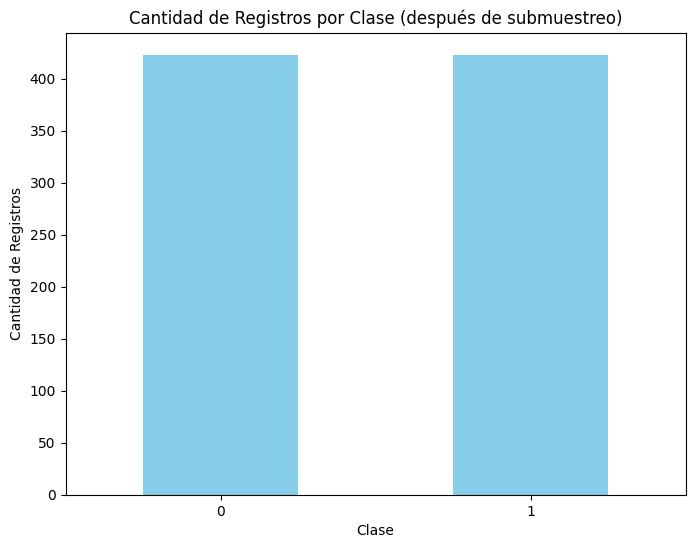

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from imblearn.under_sampling import RandomUnderSampler

# Cargar el dataset
url = '/content/bank.csv'
data = pd.read_csv(url, sep=';')

# Procesar los datos
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Transformar etiquetas a numéricas
data['y'] = label_encoder.fit_transform(data['y'])

# Dividir en características y etiquetas
X = data.drop('y', axis=1)
y = data['y']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# Aplicar submuestreo a la clase mayoritaria
#El submuestreo aleatorio reduce la cantidad de ejemplos de la clase mayoritaria a un número igual al número
#de ejemplos de la clase minoritaria, seleccionando aleatoriamente ejemplos de la clase mayoritaria sin reemplazo.
#Esto puede ayudar a equilibrar las clases y mejorar el rendimiento de los modelos de aprendizaje automático cuando
#se trata de problemas de desequilibrio de clases.

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)




# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo con los datos submuestreados
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_probs = model.predict(X_test)
y_pred = np.round(y_probs)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)

# Crear un gráfico de barras para mostrar la cantidad de registros por clase después de submuestreo
plt.figure(figsize=(8, 6))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase (después de submuestreo)')
plt.xticks(rotation=0)
plt.show()


In [ ]:

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)

f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print("F1-score:", f1)

F1-score: 0.4388888888888889


INFORME DE PRESICION

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       807
           1       0.30      0.81      0.44        98

    accuracy                           0.78       905
   macro avg       0.64      0.79      0.65       905
weighted avg       0.90      0.78      0.82       905



El F1-score varía entre 0 y 1, donde 1 representa un rendimiento perfecto y 0 representa un rendimiento pobre. Un F1-score de 0.5 se considera un punto de referencia razonable para muchas aplicaciones, pero esto puede variar dependiendo del dominio y las necesidades específicas del problema.

**La interpretación del valor óptimo del F1-score debe hacerse en el contexto del problema y las metas específicas que se estén abordando.**

EN  PARTICULAR ESTE CASO, necesitamos mejorar la sensibilidad (recall) que tiene en cuenta la exactitud en los casos verdaderos positivos ya que  nos ocupamos en las preciones de probabilidad de que potenciales clientes encuestados contraten en plazo bancario